#**Montar Google Drive**

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Mounted at /content/drive


#**Importar Biblioteca**


In [2]:
# importa as bibliotecas necessária para o código
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib import pylab
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline

In [3]:
#Importar base de dados
uri = '/content/drive/Shareddrives/Colab_Grupo2/Colab/Data/dataFrameSelecionado.csv'

#Transformar em dataset e guardar em uma váriavel
data = pd.read_csv(uri)	

#**Amostragem dos dados**

In [4]:
# divide as colunas em variaveis X e y
X = data.drop("follow_up_days", axis=1)
y = data["follow_up_days"]

In [5]:
# divide em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#**Criar modelo Nayve Bayes sem hiperparâmetros**


In [6]:
nayve = GaussianNB()

#fit
nayve.fit(X_train, y_train)

#faz prediçoes
predictions = nayve.predict(X_test)

#**Avaliando o modelo sem hiperparâmetros**


In [7]:
#Avaliando sem o uso de hiperparâmetro
print('Classification metrics: \n', classification_report(y_test, predictions))

#Medindo a taxa de erro do modelo

mse = metrics.mean_squared_error(y_test, predictions)

print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.49      0.42      0.45       179
           1       0.59      0.71      0.65       376
           2       0.63      0.49      0.55       241

    accuracy                           0.58       796
   macro avg       0.57      0.54      0.55       796
weighted avg       0.58      0.58      0.58       796

MSE (Mean-Squared-Error): 0.5766331658291457


#**Criar modelo com o método GridSearch para definir os melhores hiperparâmetros**


In [8]:
#hiperparametros 
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nayve, 
                 param_grid=params_NB, 
                 cv=3,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [9]:
#treina o modelo
new_predictions = gs_NB.predict(X_test)


#**Avaliando o com hiperparâmetros**

In [10]:
#Avaliando com o uso de hiperparâmetro
print('Classification metrics: \n', classification_report(y_test,new_predictions))

#Medindo a taxa de erro do modelo

mse = metrics.mean_squared_error(y_test, new_predictions)

print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.54      0.38      0.45       179
           1       0.58      0.75      0.65       376
           2       0.63      0.49      0.55       241

    accuracy                           0.59       796
   macro avg       0.59      0.54      0.55       796
weighted avg       0.59      0.59      0.58       796

MSE (Mean-Squared-Error): 0.5301507537688442


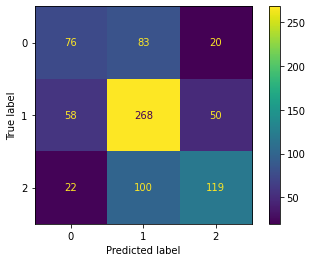

In [11]:
#Exibindo a matriz de confusão dos resultados preditos
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

In [12]:
#Construindo a base do Pipeline
pipe_rf = Pipeline([('gs_NB', GaussianNB(var_smoothing=gs_NB.best_params_['var_smoothing']))])

In [13]:
#Treinando o modelo com Pipeline
model = pipe_rf.fit(X_train, y_train)

In [14]:
#Calculando y_score
y_score = model.predict_proba(X_test)

In [15]:
#Declarando valores unicos de classes em ordem
n_binaries = y_test.unique()
n_binaries.sort()

#Binarizando a saída
y_test_bin = label_binarize(y_test, classes=n_binaries)
n_classes = y_test_bin.shape[1]


AUC for Class 1: 0.710927808915006
AUC for Class 2: 0.7065096251266465
AUC for Class 3: 0.7773092594669359


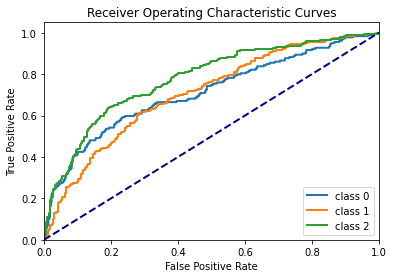

In [16]:
#Calculando e exibindo curva ROC das classes
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--' )
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()